# Keras Classification

Keras Documentation: https://keras.io

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## 1. Read data & create train/test split

In [2]:
df = pd.read_csv('../data/geoloc_elev.csv')

# we only use the 2 features that matter
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

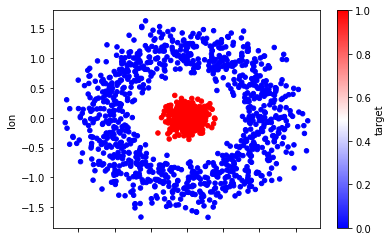

In [3]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

## 2. Shallow neural network

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [5]:
model = Sequential()

model.add(Dense(1, input_dim=2, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/10
945/945 [==============================] - 1s 1ms/step - loss: 0.6709 - acc: 0.5619 - val_loss: 0.6551 - val_acc: 0.6381
Epoch 2/10
945/945 [==============================] - 0s 94us/step - loss: 0.6451 - acc: 0.6582 - val_loss: 0.6547 - val_acc: 0.6381
Epoch 3/10
945/945 [==============================] - 0s 97us/step - loss: 0.6446 - acc: 0.6582 - val_loss: 0.6559 - val_acc: 0.6381
Epoch 4/10
945/945 [==============================] - 0s 100us/step - loss: 0.6439 - acc: 0.6582 - val_loss: 0.6542 - val_acc: 0.6381
Epoch 5/10
945/945 [==============================] - 0s 102us/step - loss: 0.6439 - acc: 0.6582 - val_loss: 0.6540 - val_acc: 0.6381
Epoch 6/10
945/945 [==============================] - 0s 102us/step - loss: 0.6442 - acc: 0.6582 - val_loss: 0.6540 - val_acc: 0.6381
Epoch 7/10
945/945 [==============================] - 0s 99us/step - loss: 0.6443 - acc: 0.6582 - val_loss: 0.6543 - val_acc: 0.6381
Epoch 8/10
945/945 [=

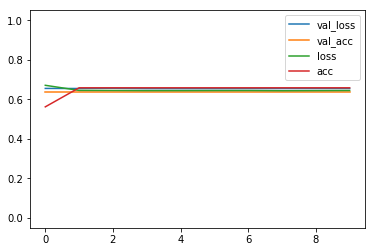

In [6]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 3. Deep neural network

In [7]:
# model = Sequential()

# model.add(Dense(4, input_dim=2, activation='tanh'))
# model.add(Dense(4, activation='tanh'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

# h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 352us/step - loss: 0.6486 - acc: 0.6190 - val_loss: 0.6198 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 100us/step - loss: 0.5750 - acc: 0.6222 - val_loss: 0.5419 - val_acc: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 102us/step - loss: 0.4698 - acc: 0.7450 - val_loss: 0.3786 - val_acc: 0.9143
Epoch 4/20
945/945 [==============================] - 0s 103us/step - loss: 0.2678 - acc: 0.9439 - val_loss: 0.1544 - val_acc: 0.9714
Epoch 5/20
945/945 [==============================] - 0s 105us/step - loss: 0.1003 - acc: 0.9926 - val_loss: 0.0614 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 105us/step - loss: 0.0470 - acc: 0.9968 - val_loss: 0.0368 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 109us/step - loss: 0.0286 - acc: 0.9979 - val_loss: 0.0244 - val_acc: 1.0000
Epoch 8/20
945/9

In [18]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='relu'))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 431us/step - loss: 0.5314 - acc: 0.6444 - val_loss: 0.4454 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 97us/step - loss: 0.3972 - acc: 0.7989 - val_loss: 0.3492 - val_acc: 0.8857
Epoch 3/20
945/945 [==============================] - 0s 95us/step - loss: 0.3380 - acc: 0.8730 - val_loss: 0.3123 - val_acc: 0.9048
Epoch 4/20
945/945 [==============================] - 0s 98us/step - loss: 0.3090 - acc: 0.8720 - val_loss: 0.2915 - val_acc: 0.8952
Epoch 5/20
945/945 [==============================] - 0s 98us/step - loss: 0.2854 - acc: 0.8910 - val_loss: 0.2816 - val_acc: 0.8952
Epoch 6/20
945/945 [==============================] - 0s 97us/step - loss: 0.2583 - acc: 0.9005 - val_loss: 0.2450 - val_acc: 0.9143
Epoch 7/20
945/945 [==============================] - 0s 98us/step - loss: 0.1893 - acc: 0.9513 - val_loss: 0.1627 - val_acc: 0.9810
Epoch 8/20
945/945 [==

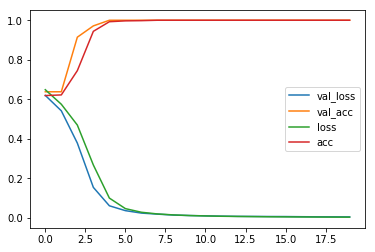

In [8]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 4. Accuracy score on benchmark, train and test sets

In [9]:
bm_score = pd.Series(y).value_counts()[0] / len(y)
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Benchmark:\t{:0.3}
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(bm_score, train_score, test_score))

Accuracy scores:
   Benchmark:	0.667
   Train:	1.0
   Test:	1.0


## 5. Confusion Matrix and Classification Report

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [12]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       311
          1       1.00      1.00      1.00       139

avg / total       1.00      1.00      1.00       450



## 6. Display the decision boundary

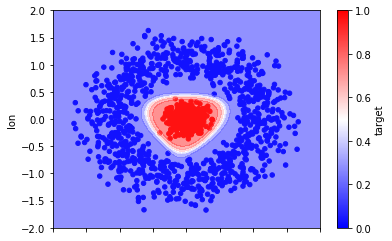

In [13]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Exercise 1

- Try changing the network architecture and re-train the model at each change. Can you make it converge faster?
    - add 1 inner layer
    - change the number of nodes in each layer
    - change the activation function
    - change the optimizer (have a look at https://keras.io/optimizers)